In [2]:
import pandas as pd
athlete=pd.read_csv("athlete_events.csv")
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [55]:
athlete.shape

(269731, 16)

In [49]:
# check the data types, remove duplicate rows, check if any missiong value.

athlete.dtypes
athlete.duplicated().sum()
athlete.drop_duplicates(inplace=True)


In [226]:
# athlete.groupby('Team').count()

In [225]:
# athlete.groupby('Team')['Medal'].sum()

In [255]:
filter=athlete.groupby('Team')['ID'].count()>50

## 1. Which countries won the most medals, and plot it.

In [68]:

# for country, data in athlete.groupby('NOC'):
#     print(country, data)


athlete.groupby('NOC')['Medal'].count().nlargest(20)


NOC
USA    5637
URS    2503
GER    2165
GBR    2067
FRA    1767
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
HUN    1135
NED    1040
NOR    1033
GDR    1005
CHN     989
JPN     913
FIN     900
SUI     691
ROU     653
KOR     638
Name: Medal, dtype: int64

In [329]:
countries=[country for country,data in athlete.groupby('NOC')]
results=athlete.groupby('NOC')['Medal'].count()



In [293]:
# medal_count=dict()
# for i in range(len(countries)):
#     medal_count[countries[i]]=results[i]

medal_count={countries[i]:results[i] for i in range(len(countries))}

medal_2=[(count,country) for country, count in medal_count.items()]

medal_3=sorted(medal_2,reverse=True)
medal_3

[(5637, 'USA'),
 (2503, 'URS'),
 (2165, 'GER'),
 (2067, 'GBR'),
 (1767, 'FRA'),
 (1637, 'ITA'),
 (1536, 'SWE'),
 (1352, 'CAN'),
 (1320, 'AUS'),
 (1165, 'RUS'),
 (1135, 'HUN'),
 (1040, 'NED'),
 (1033, 'NOR'),
 (1005, 'GDR'),
 (989, 'CHN'),
 (913, 'JPN'),
 (900, 'FIN'),
 (691, 'SUI'),
 (653, 'ROU'),
 (638, 'KOR'),
 (597, 'DEN'),
 (586, 'FRG'),
 (565, 'POL'),
 (489, 'ESP'),
 (488, 'TCH'),
 (475, 'BRA'),
 (468, 'BEL'),
 (450, 'AUT'),
 (409, 'CUB'),
 (390, 'YUG'),
 (342, 'BUL'),
 (279, 'EUN'),
 (274, 'ARG'),
 (255, 'GRE'),
 (228, 'NZL'),
 (199, 'UKR'),
 (197, 'IND'),
 (157, 'JAM'),
 (149, 'CRO'),
 (144, 'CZE'),
 (139, 'BLR'),
 (131, 'RSA'),
 (121, 'PAK'),
 (110, 'MEX'),
 (106, 'KEN'),
 (99, 'NGR'),
 (95, 'TUR'),
 (85, 'SRB'),
 (77, 'KAZ'),
 (68, 'IRI'),
 (67, 'PRK'),
 (64, 'SCG'),
 (63, 'URU'),
 (61, 'LTU'),
 (53, 'ETH'),
 (50, 'EST'),
 (49, 'TPE'),
 (48, 'SLO'),
 (47, 'SVK'),
 (44, 'AZE'),
 (41, 'POR'),
 (41, 'INA'),
 (40, 'BAH'),
 (35, 'LAT'),
 (35, 'IRL'),
 (34, 'UZB'),
 (32, 'TTO'),
 (3

In [261]:
medal_3[0][1]

'USA'

<function matplotlib.pyplot.show(close=None, block=None)>

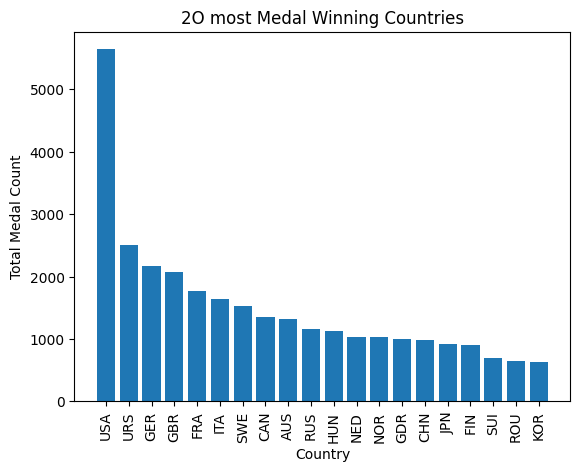

In [286]:
country_20=[y for (x,y) in medal_3[:20]]
count_20=[x for (x,y) in medal_3[:20]]

import matplotlib.pyplot as plt
plt.bar(country_20, count_20)
plt.xticks(country_20,rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Total Medal Count')
plt.title('2O most Medal Winning Countries')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

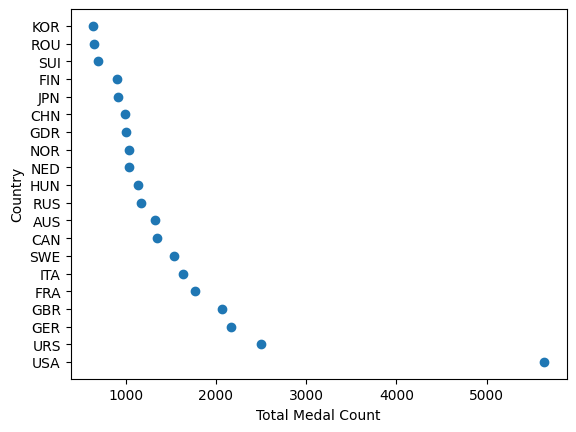

In [294]:
test=list(zip(countries,results))
test_re=[(b,a) for (a,b) in test]
test_s=sorted(test_re,reverse=True)[:20]

import matplotlib.pyplot as plt
plt.scatter(*zip(*test_s))
plt.xlabel('Total Medal Count')
plt.ylabel('Country')

plt.show

In [333]:
# data_frame = athlete[athlete['Sex']=='M']
# data_frame.loc[:, ~athlete.columns.isin(['Event','Medal', 'Sport'])].head(20)

# data_frame.loc[:, ~athlete.columns.isin(['Event','Medal', 'Sport'])].duplicated().value_counts()

# data_frame[data_frame.loc[:, ~athlete.columns.isin(['Event','Medal', 'Sport'])].duplicated()]


## 2. How is the athlete age changes over the years between different sex.

<function matplotlib.pyplot.show(close=None, block=None)>

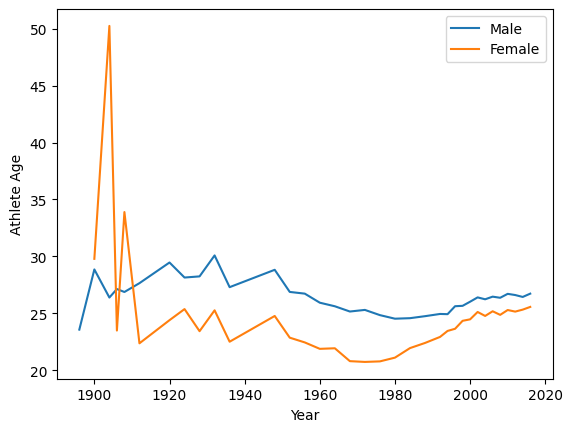

In [332]:
import matplotlib.pyplot as plt
def athlete_age(gender):
    data_frame = athlete[athlete['Sex']==gender]
    year= [year for year,data in data_frame.groupby('Year')]
    age = data_frame.groupby('Year')['Age'].mean()
    return(year, age)
  
plt.plot(athlete_age('M')[0], athlete_age('M')[1], label='Male')
plt.plot(athlete_age('F')[0], athlete_age('F')[1], label='Female')
plt.xlabel('Year')
plt.ylabel('Athlete Age')
plt.legend()
plt.show

## 3.  Show the medal count distributions over different sports in USA team.

In [334]:

usa=athlete[athlete["NOC"]=='USA']
usa

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [340]:
pd.crosstab(usa['Sport'], usa['Medal'],margins=True, margins_name='Total')

Medal,Bronze,Gold,Silver,Total
Sport,,,,
Alpine Skiing,9,16,19,44
Archery,16,22,19,57
Art Competitions,0,4,5,9
Athletics,221,542,317,1080
Baseball,44,24,0,68
Basketball,36,281,24,341
Beach Volleyball,4,12,4,20
Bobsleigh,28,23,23,74
Boxing,39,50,24,113


In [416]:
sport=[sport for sport,data in usa.groupby('Sport')]
results=usa.groupby('Sport')['Medal'].count()


df = pd.DataFrame({'Sport':sport,
                        'Medal Count':results}).sort_values('Medal Count',ascending = False)

df.reset_index(drop=True, inplace=True)
df2=df.iloc[:7,]

new_row = pd.DataFrame(data={'Sport':['Other'], 'Medal Count':[df['Medal Count'][7:,].sum()]})

df3= pd.concat([df2,new_row], ignore_index=True)

df3


,Sport,Medal Count
0,Athletics,1080
1,Swimming,1078
2,Rowing,375
3,Basketball,341
4,Ice Hockey,276
5,Gymnastics,194
6,Shooting,193
7,Other,2100


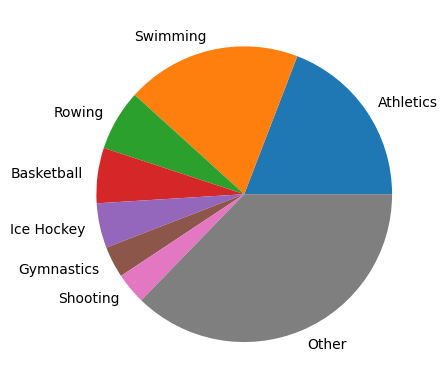

In [417]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.pie(df3['Medal Count'], labels = df3['Sport'])

plt.show()


## crosstab and pivot table

In [429]:
pd.crosstab(athlete['Sport'], athlete['Sex'], values=athlete['Weight'], aggfunc='mean')

Sex,F,M
Sport,,
Alpine Skiing,62.640307,78.626035
Archery,62.013575,77.066866
Art Competitions,NaN,77.894737
Athletics,60.239798,73.839129
Badminton,61.586364,74.362536
Baseball,NaN,85.707792
Basketball,73.685170,91.683529
Beach Volleyball,68.350943,89.512821
Biathlon,57.306586,72.632123


In [432]:
athlete.groupby(['Sport','Sex'])['Weight'].mean().max()

95.61538461538461

In [25]:
def medal_number(x):
    if x in ['Gold','Bronze','Silver']:
        return 1
    else:
        return 0


In [26]:
athlete['Medal_new']=athlete['Medal'].apply(medal_number)
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_new
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,0


In [ ]:
# def medalist(row):
#     if row['Medal'] in ['Bronze','Silver','Gold']:
#         return 1
#     else:
#         return 0
# athlete2['Medalist']=athlete2.apply(medalist,axis=1)
# athlete2.head()
# athlete2.drop('Medalist',axis=1)

In [36]:
pd.crosstab(athlete['Sex'],athlete['Medal_new'])

Medal_new,0,1
Sex,,
F,63269,11253
M,168064,28530


In [41]:
pd.pivot_table(data=athlete, index='Sex',columns='Medal_new',values=['Age','Height','Weight']) #aggfunc='mean'

Age                 Height                 Weight           
Medal_new          0          1           0           1          0          1
Sex                                                                          
F          23.594127  24.509167  167.354499  170.474804  59.434446  63.219378
M          26.239318  26.497178  178.473681  181.156113  75.170519  79.203782

## 4. Are there age differences for male and female Olympic gymnasts who were successful or not in earning a medal, and how has the age distribution changed over the years?

In [48]:
athlete.isna().sum()

ID                0
Name              0
Sex               0
Age            9474
Height        60171
Weight        62875
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal        231333
Medal_new         0
dtype: int64

In [75]:
athlete1=athlete.dropna(subset=['Age'])
athlete2=athlete1.loc[athlete1['Sport']=="Gymnastics",]
athlete2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_new
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,1
43,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN,0
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,1
45,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270911,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Balance Beam,NaN,0
270914,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver,1
270915,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver,1
270916,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,0


<function matplotlib.pyplot.show(close=None, block=None)>

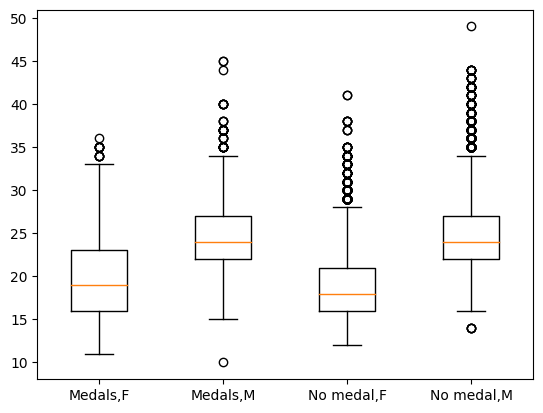

In [116]:
def group(sex, medal_new):
    return athlete2.loc[(athlete2['Sex']==sex) & (athlete2['Medal_new']== medal_new), ]['Age']

group('F',1)
data=[group('F',1),group('M',1),group('F',0), group('M',0)]
data

import matplotlib.pyplot as plt
plt.boxplot(data)
plt.xticks([1,2,3,4],['Medals,F', 'Medals,M','No medal,F','No medal,M'])
plt.show

In [175]:
athlete2.sort_values('Year',inplace=True)

/var/folders/th/f44w4zsd62jgtt6pnt8hzj6r0000gn/T/ipykernel_34597/397188184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete2.sort_values('Year',inplace=True)


In [196]:
pd.pivot_table(data=athlete2, index='Year',columns='Sex',values='Age',aggfunc='mean')

Sex,F,M
Year,,
1896,NaN,24.287671
1900,NaN,22.212121
1904,NaN,25.116719
1906,NaN,24.671429
1908,NaN,23.162500
1912,NaN,24.206452
1920,NaN,26.747573
1924,NaN,27.589178
1928,19.400000,26.053232


In [176]:
athlete2['Year'].unique()

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [230]:
def get_sex_data(sex):
    df = athlete2.loc[athlete2['Sex']==sex,]
    age_peryear=[]
    for i in athlete2['Year'].unique():
        age=df.loc[df['Year']==i,]['Age']
        age_peryear.append(age)
    return age_peryear, athlete2['Year'].unique()
    


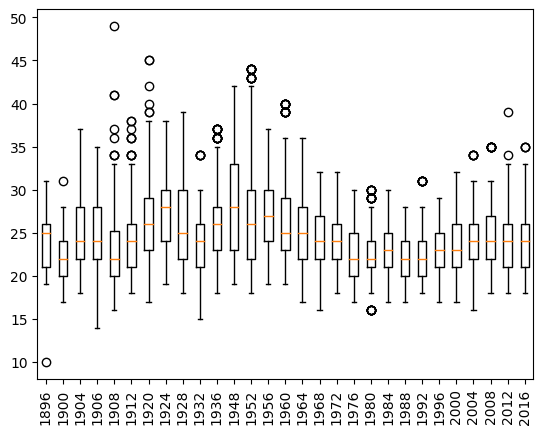

In [217]:
def plot1(sex):
    import matplotlib.pyplot as plt
    plt.boxplot(get_sex_data(sex)[0])
    plt.xticks([i for i in range(1,len(get_sex_data(sex)[1])+1)], get_sex_data(sex)[1],rotation=90)
    plt.show
    

plot1('M')

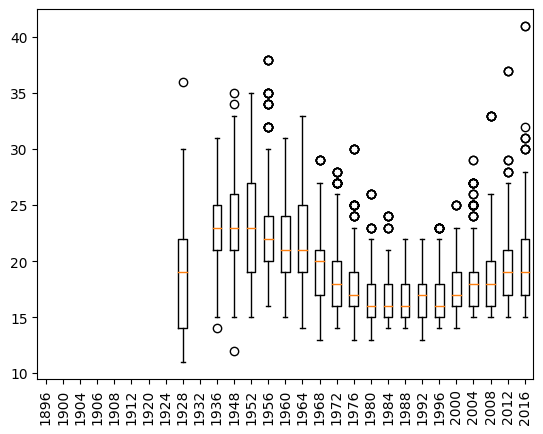

In [218]:
plot1('F')

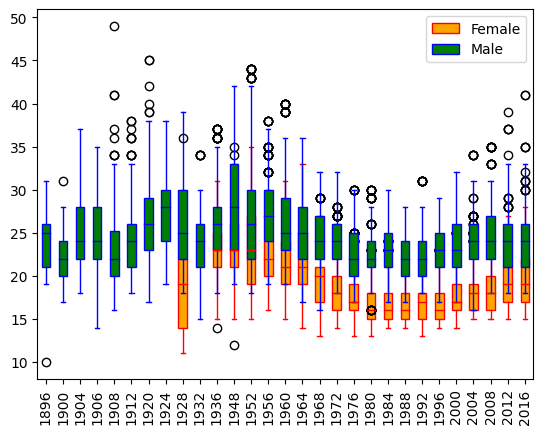

In [229]:
import matplotlib.pyplot as plt

def box_plot1(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp
    
female = get_sex_data('F')[0]
male = get_sex_data('M')[0]

fig, ax = plt.subplots()
bp1 = box_plot1(female, 'red', 'orange')
bp2 = box_plot1(male, 'blue', 'green')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Female', 'Male'])
plt.xticks([i for i in range(1,len(get_sex_data('M')[1])+1)], get_sex_data('M')[1],rotation=90)
#ax.set_ylim(0, 50)
plt.show()

Series([], Name: Age, dtype: float64)

In [232]:
pd.pivot_table(data=athlete2, index='Year',columns='Medal_new',values='Age',aggfunc='mean')

Medal_new,0,1
Year,,
1896,23.523810,25.322581
1900,21.933333,25.000000
1904,24.904412,26.400000
1906,24.857143,24.547619
1908,23.538462,22.608247
1912,23.642857,24.525253
1920,28.512821,26.335329
1924,27.523077,28.272727
1928,25.916497,23.685714


In [231]:



def get_age_data(medal):
    df = athlete2.loc[athlete2['Medal_new']==medal,]
    age_peryear=[]
    for i in df['Year'].unique():
        age=df.loc[df['Year']==i,]['Age']
        age_peryear.append(age)
    return age_peryear, df['Year'].unique()
    

In [180]:
sum(get_age_data(1)[1]==get_age_data(0)[1])

29

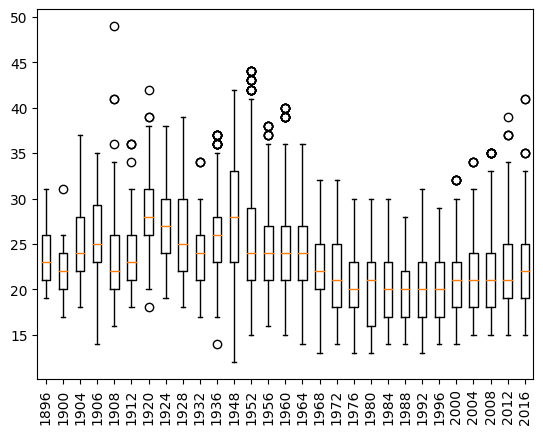

In [215]:
def plot(medal):
    import matplotlib.pyplot as plt
    plt.boxplot(get_age_data(medal)[0])
    plt.xticks([i for i in range(1,len(get_age_data(medal)[1])+1)], get_age_data(medal)[1],rotation=90)
    plt.show
    
plot(0)


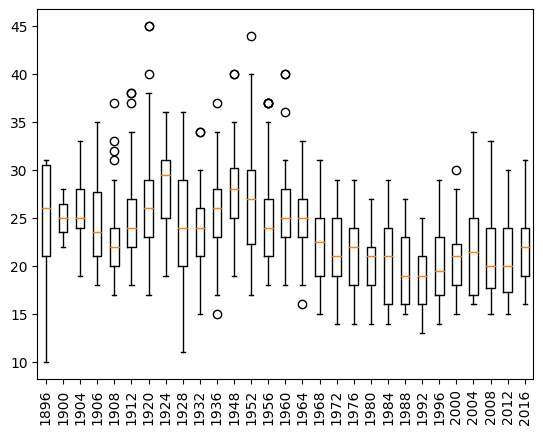

In [188]:
plot(1)

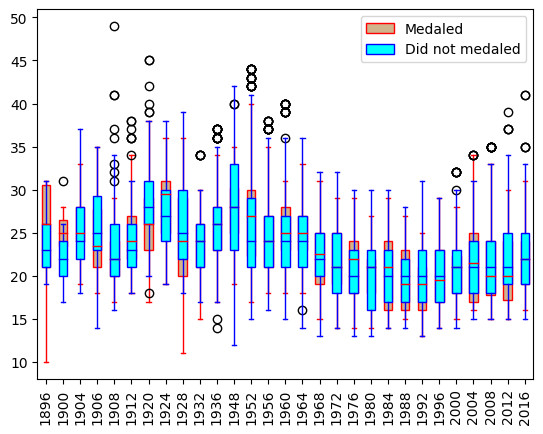

In [195]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp
    
medal = get_age_data(1)[0]
nomedal = get_age_data(0)[0]

fig, ax = plt.subplots()
bp1 = box_plot(medal, 'red', 'tan')
bp2 = box_plot(nomedal, 'blue', 'cyan')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Medaled', 'Did not medaled'])
plt.xticks([i for i in range(1,len(get_age_data(1)[1])+1)], get_age_data(1)[1],rotation=90)
#ax.set_ylim(0, 50)
plt.show()